# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1939]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
#from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2,l1,l1_l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [1940]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [1941]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1942]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [1943]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1944]:
def label_enc(x):
    enc = LabelEncoder()
    df[x] = enc.fit_transform(df[x])
label_enc('fueltype')
label_enc('fuelsystem')
label_enc('aspiration')
label_enc('carbody')
label_enc('drivewheel')
label_enc('enginetype')
label_enc('enginelocation')
label_enc('cylindernumber')
df['doornumber'] = df['doornumber'].map({'two':2,'four':4})

In [1945]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


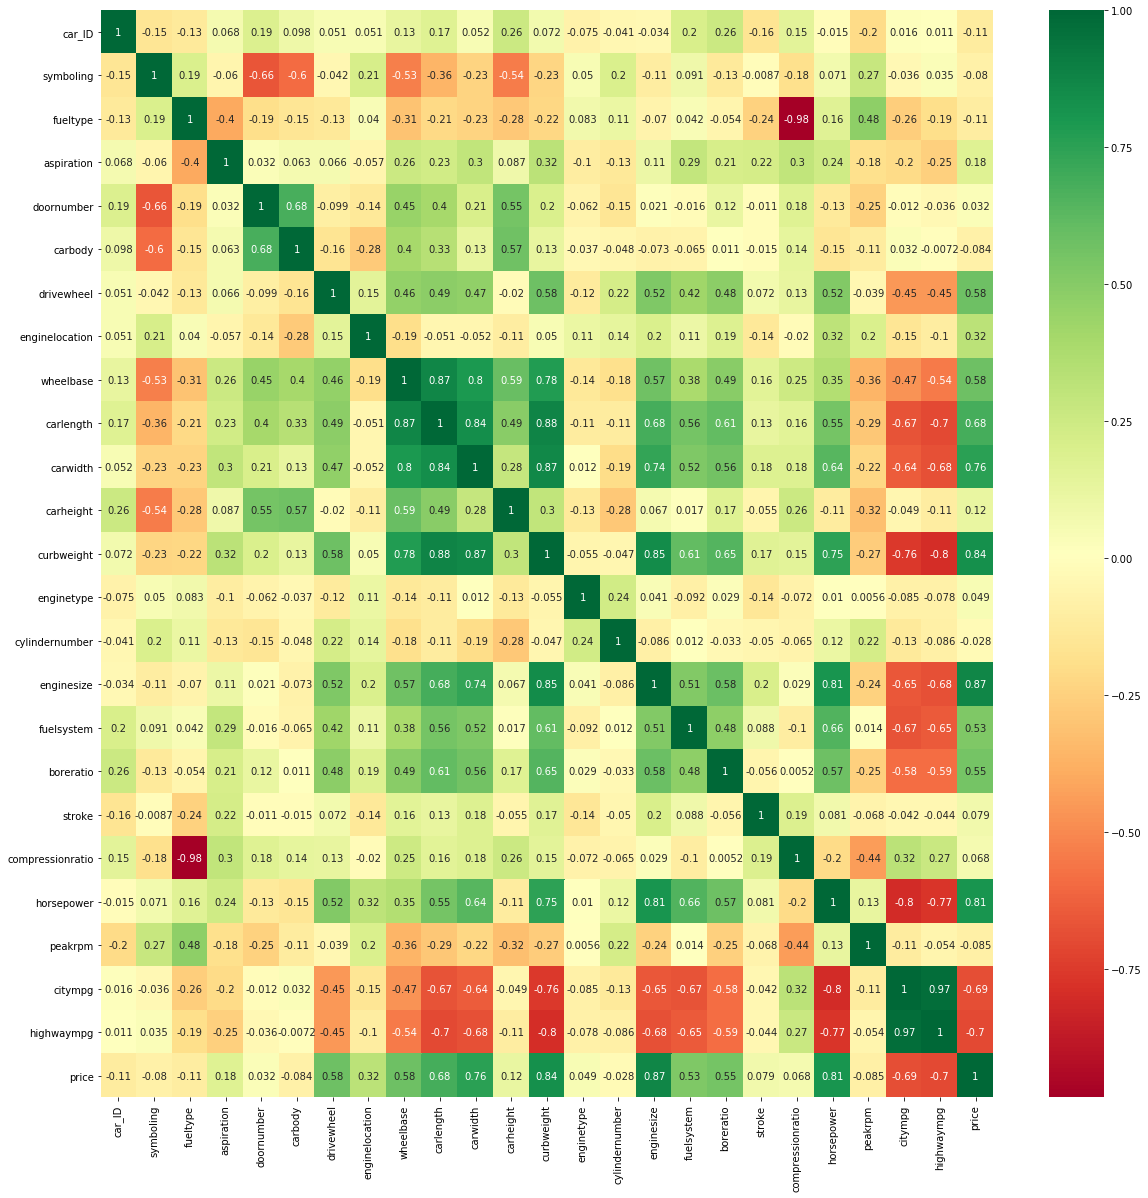

In [1946]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(), annot=True,cmap='RdYlGn')

In [1947]:
df.drop(labels=['car_ID','CarName','symboling','fueltype','doornumber','carbody','cylindernumber','enginetype','compressionratio','stroke','peakrpm','citympg','highwaympg'],axis=1,inplace=True)

In [1948]:
df['aspiration'] = to_categorical(df['aspiration'],num_classes=2)
df['drivewheel'] = to_categorical(df['drivewheel'],num_classes=3)
df['enginelocation'] = to_categorical(df['enginelocation'],num_classes=2)
df['fuelsystem'] = to_categorical(df['fuelsystem'],num_classes=8)

In [1949]:
data = df.loc[:,df.columns != 'price']
targets = df.loc[:,df.columns == 'price']

In [1950]:
data

,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,horsepower
0,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,130,0.0,3.47,111
1,1.0,0.0,1.0,88.6,168.8,64.1,48.8,2548,130,0.0,3.47,111
2,1.0,0.0,1.0,94.5,171.2,65.5,52.4,2823,152,0.0,2.68,154
3,1.0,0.0,1.0,99.8,176.6,66.2,54.3,2337,109,0.0,3.19,102
4,1.0,1.0,1.0,99.4,176.6,66.4,54.3,2824,136,0.0,3.19,115
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,0.0,1.0,109.1,188.8,68.9,55.5,2952,141,0.0,3.78,114
201,0.0,0.0,1.0,109.1,188.8,68.8,55.5,3049,141,0.0,3.78,160
202,1.0,0.0,1.0,109.1,188.8,68.9,55.5,3012,173,0.0,3.58,134
203,0.0,0.0,1.0,109.1,188.8,68.9,55.5,3217,145,0.0,3.01,106


In [1951]:
train_data,test_data,train_targets,test_targets = train_test_split(data,targets,test_size=0.3,random_state=45)

In [1952]:
pd.options.mode.chained_assignment = None 
#num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','carheight']
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
val_data -= mean
val_data /= std
test_data -= mean
test_data /= std

mean = train_targets.mean(axis=0)
train_targets -= mean
std = train_targets.std(axis=0)
train_targets /= std
val_targets -= mean
val_targets /= std
test_targets -= mean
test_targets /= std

train_data[num_vars[:-1]].std()

train_targets = train_data['price']
train_data = train_data.drop('price',axis=1)
val_targets = val_data['price']
val_data = val_data.drop('price',axis=1)
test_targets = test_data['price']
test_data = test_data.drop('price',axis=1)
train_data

In [1953]:
train_data

,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,horsepower
202,0.447516,-0.18968,0.145872,1.638947,1.136147,1.334162,0.812846,0.847119,1.046474,-0.226077,0.854488,0.649972
172,0.447516,-0.18968,0.145872,-0.059382,0.168932,-0.154585,-0.265819,0.778814,0.420341,-0.226077,0.995222,0.227703
76,0.447516,-0.18968,0.145872,-0.805377,-1.281890,-0.695947,-1.215044,-1.172494,-0.831925,-0.226077,-1.291697,-0.898346
188,0.447516,-0.18968,0.145872,-0.233977,-0.176501,-0.199698,0.899139,-0.467291,-0.437693,-0.226077,-0.517663,-0.147646
102,0.447516,-0.18968,0.145872,0.258063,0.813742,0.251437,1.071725,1.371405,1.231995,-0.226077,0.326738,1.072240
...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.447516,-0.18968,0.145872,-0.805377,-1.842260,-0.876401,-0.438406,-1.322026,-1.133397,4.392346,-1.502797,-1.086021
124,-2.218932,-0.18968,0.145872,-0.456188,-0.061357,0.161210,-1.473924,0.488979,0.652242,-0.226077,0.889672,0.908025
131,0.447516,-0.18968,0.145872,-0.424444,0.214990,0.296550,-1.344484,-0.171918,0.095680,-0.226077,0.432288,-0.382240
158,0.447516,-0.18968,0.145872,-0.487932,-0.591022,-0.695947,-0.265819,-0.513443,-0.414503,-0.226077,-0.236196,-1.179858


In [1954]:
def build_model():
    model = Sequential()
    model.add(Dense(12, activation='relu',input_shape=(train_data.shape[1],),kernel_regularizer=l2(1e-6)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

In [1955]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

#num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
train_targets = np.asarray(train_targets)
val_data = np.asarray(val_data)
val_targets = np.asarray(val_targets)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [1956]:
model = build_model()

history = model.fit(partial_train_data, partial_train_targets,validation_split=0.2,epochs=num_epochs)

Train on 86 samples, validate on 22 samples
Epoch 1/100
86/86 [==============================] - 2s 19ms/sample - loss: 0.8529 - mae: 0.6728 - val_loss: 0.5292 - val_mae: 0.5415
Epoch 2/100
86/86 [==============================] - 0s 628us/sample - loss: 0.8148 - mae: 0.6545 - val_loss: 0.4979 - val_mae: 0.5224
Epoch 3/100
86/86 [==============================] - 0s 733us/sample - loss: 0.7735 - mae: 0.6371 - val_loss: 0.4779 - val_mae: 0.5067
Epoch 4/100
86/86 [==============================] - 0s 570us/sample - loss: 0.7344 - mae: 0.6194 - val_loss: 0.4578 - val_mae: 0.4899
Epoch 5/100
86/86 [==============================] - 0s 593us/sample - loss: 0.6985 - mae: 0.6037 - val_loss: 0.4386 - val_mae: 0.4734
Epoch 6/100
86/86 [==============================] - 0s 546us/sample - loss: 0.6740 - mae: 0.5897 - val_loss: 0.4193 - val_mae: 0.4595
Epoch 7/100
86/86 [==============================] - 0s 558us/sample - loss: 0.6424 - mae: 0.5747 - val_loss: 0.4016 - val_mae: 0.4480
Epoch 8/100


Epoch 61/100
86/86 [==============================] - 0s 512us/sample - loss: 0.3537 - mae: 0.3306 - val_loss: 0.2069 - val_mae: 0.2700
Epoch 62/100
86/86 [==============================] - 0s 477us/sample - loss: 0.3530 - mae: 0.3299 - val_loss: 0.2069 - val_mae: 0.2699
Epoch 63/100
86/86 [==============================] - 0s 547us/sample - loss: 0.3523 - mae: 0.3294 - val_loss: 0.2069 - val_mae: 0.2697
Epoch 64/100
86/86 [==============================] - 0s 558us/sample - loss: 0.3518 - mae: 0.3290 - val_loss: 0.2070 - val_mae: 0.2698
Epoch 65/100
86/86 [==============================] - 0s 535us/sample - loss: 0.3511 - mae: 0.3285 - val_loss: 0.2070 - val_mae: 0.2694
Epoch 66/100
86/86 [==============================] - 0s 558us/sample - loss: 0.3505 - mae: 0.3279 - val_loss: 0.2069 - val_mae: 0.2690
Epoch 67/100
86/86 [==============================] - 0s 558us/sample - loss: 0.3501 - mae: 0.3277 - val_loss: 0.2069 - val_mae: 0.2686
Epoch 68/100
86/86 [============================

In [1957]:
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [1958]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [1959]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [1960]:
average_mae_history[-1]

0.261252

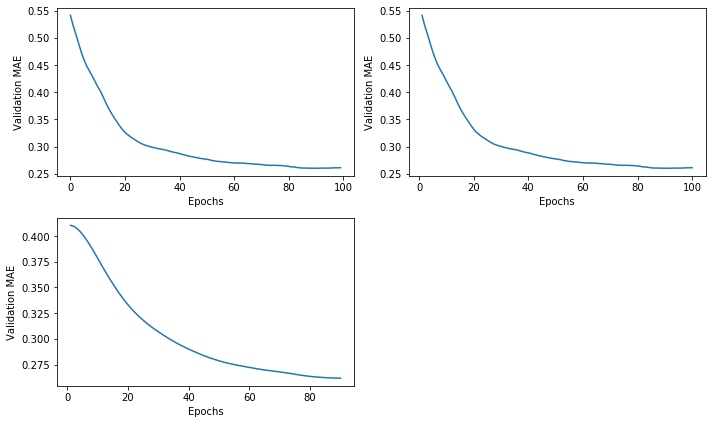

In [1961]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(2,2,2)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(2,2,3)
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.tight_layout()
plt.show()

model = build_model()
model.fit(train_data, train_targets,
          epochs=50, batch_size=16)

In [1962]:
test_mse_score, test_mae_score = model.evaluate(test_data.values, test_targets.values)

62/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [1963]:
scaled = model.predict(test_data)
(scaled*std['price']) + mean['price']

array([[12090.844 ],
       [10443.956 ],
       [13907.486 ],
       [21128.797 ],
       [ 5977.5044],
       [13897.309 ],
       [ 7361.643 ],
       [16119.585 ],
       [10049.721 ],
       [16148.914 ],
       [17887.092 ],
       [16688.893 ],
       [11230.687 ],
       [ 7238.465 ],
       [11414.684 ],
       [ 8455.393 ],
       [18206.96  ],
       [12307.672 ],
       [ 6228.5933],
       [19767.047 ],
       [20088.861 ],
       [ 8740.994 ],
       [ 6252.8975],
       [18253.309 ],
       [18050.05  ],
       [10448.    ],
       [ 6233.6973],
       [ 8440.26  ],
       [ 7447.2227],
       [ 5977.5044],
       [ 7071.1978],
       [ 6997.939 ],
       [11119.634 ],
       [21807.297 ],
       [11912.452 ],
       [10515.086 ],
       [ 8059.575 ],
       [ 8638.174 ],
       [ 8983.657 ],
       [ 7712.3247],
       [10137.001 ],
       [18830.59  ],
       [ 9177.029 ],
       [ 9583.608 ],
       [17332.992 ],
       [ 8686.348 ],
       [12132.323 ],
       [20192